In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline  

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/home/arvind/Documents/ML/haberman.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


# About Haberman Dataset

In [6]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [8]:
df['nodes'].value_counts().sort_index()

0     136
1      41
2      20
3      20
4      13
5       6
6       7
7       7
8       7
9       6
10      3
11      4
12      2
13      5
14      4
15      3
16      1
17      1
18      1
19      3
20      2
21      1
22      3
23      3
24      1
25      1
28      1
30      1
35      1
46      1
52      1
Name: nodes, dtype: int64

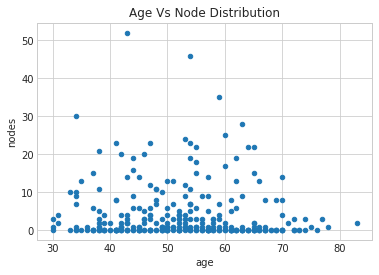

In [14]:
df.plot(kind  = 'scatter',x='age',y='nodes')
plt.title('Age Vs Node Distribution')
plt.show()

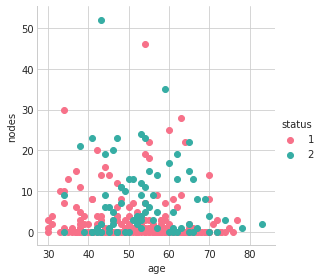

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="status",palette="husl", size=4 )\
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

1. By Seeing Above Plot, It can be observed majority of the nodes less than 5 which is 75%.
2. More than 40% of the nodes are 0.
3. In all age range, we can observed that no of nodes above 25 is minimal.

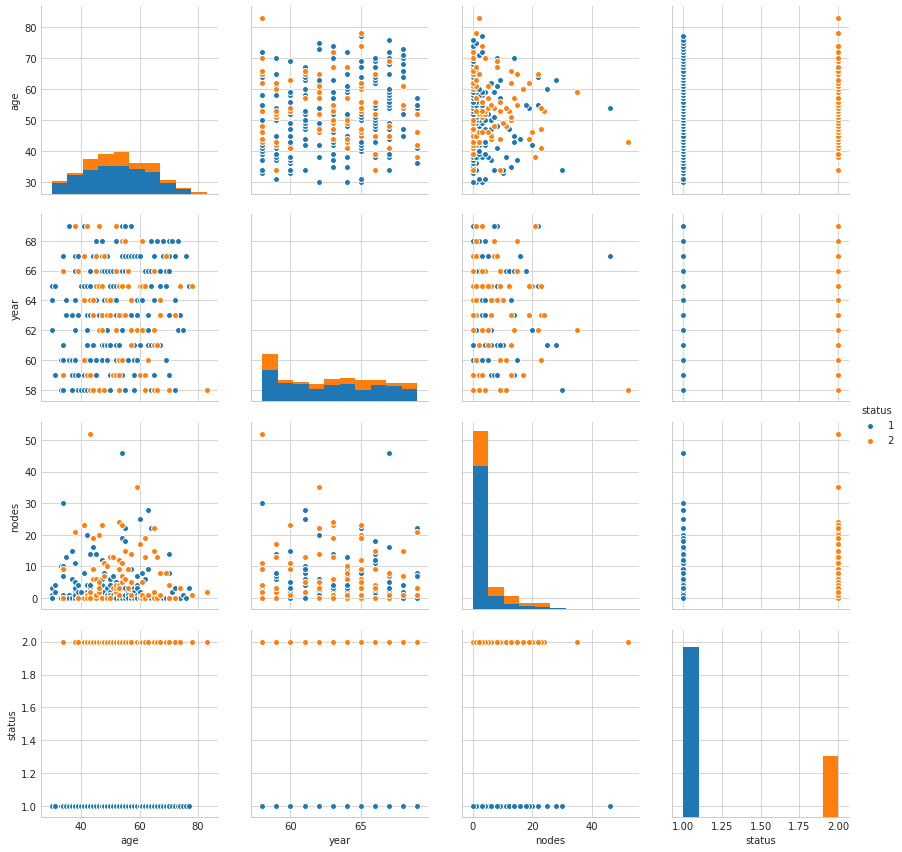

In [8]:
sns.set_style("whitegrid");
sns.pairplot(df,hue = 'status',size = 3)
plt.show()

In [10]:
df_survival_5_or_more = df.loc[df['status']==1]
df_survival_within_5 = df.loc[df['status']==2]

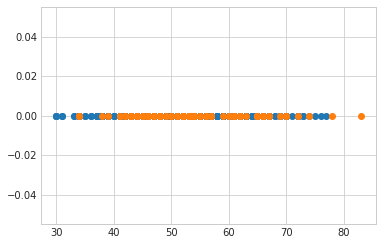

In [20]:
plt.plot(df_survival_5_or_more["age"], np.zeros_like(df_survival_5_or_more['age']), 'o')
plt.plot(df_survival_within_5["age"], np.zeros_like(df_survival_within_5['age']), 'o')
plt.show()

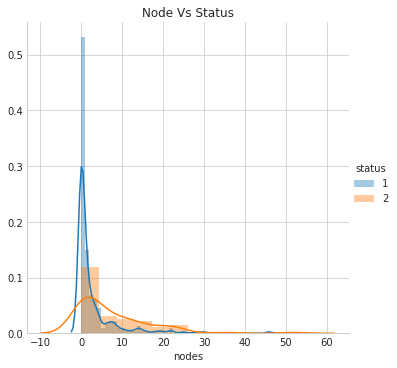

In [23]:
sns.FacetGrid(df, hue='status', size = 5) \
    .map(sns.distplot, 'nodes') \
    .add_legend();
plt.title('Node Vs Status')
plt.show();

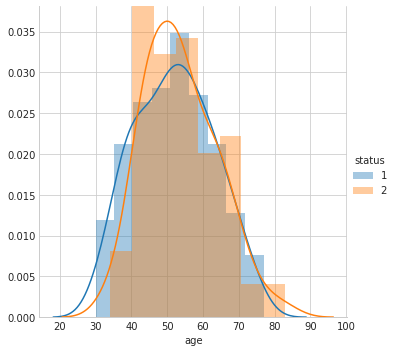

In [30]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

1.This histogram is overlapping each other, but still we can say that people within range of 40-60 are more likely to die.

2.People less than age 40 are more likely to survive

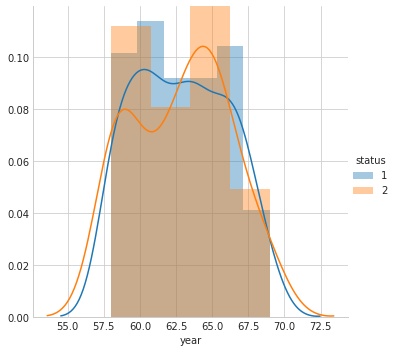

In [31]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

Large number of patients died whos operation was done in year 60 and 65

# CDF

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]


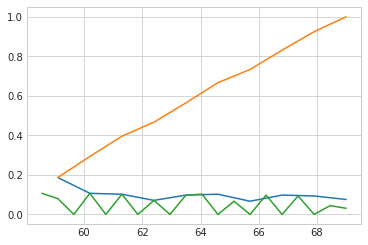

In [51]:
#df_survival_5_or_more 
counts, bin_edges = np.histogram(df_survival_5_or_more['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_survival_5_or_more['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

#df_survival_within_5 


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


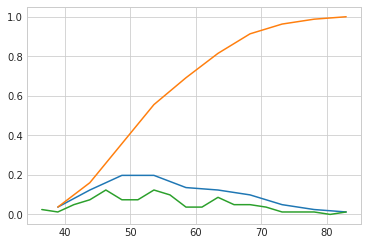

In [52]:
#df_survival_within_5 
counts, bin_edges = np.histogram(df_survival_within_5['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_survival_within_5['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]


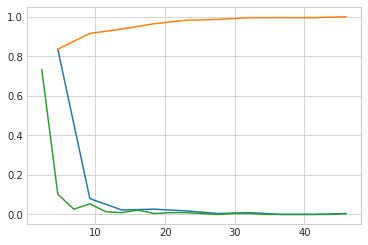

In [53]:
counts, bin_edges = np.histogram(df_survival_5_or_more['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_survival_5_or_more['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]


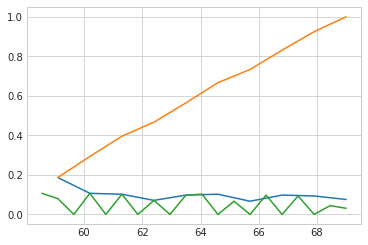

In [54]:
counts, bin_edges = np.histogram(df_survival_5_or_more['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_survival_5_or_more['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

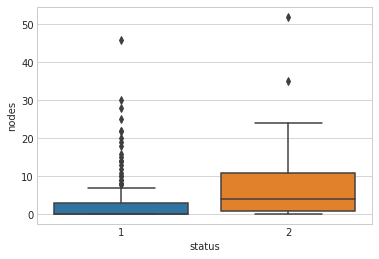

In [55]:
sns.boxplot(x='status', y = 'nodes', data=df)
plt.show()

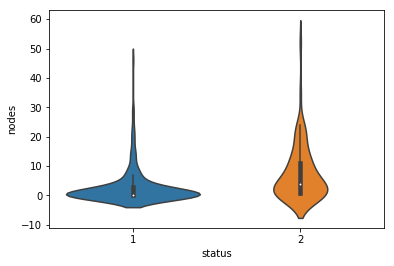

In [10]:
sns.violinplot(x='status', y='nodes', data = df, size = 9)
plt.show()

After taking a look at violin plot we can see that, the large number of patients who survived had 0 axil nodes or doesn't had it at all.

Patients and who died had axil node greater than or equal to 1, and as the concentration of axil node increases the repective patient is more likely to die.

# Conclusion
